# Experiment Analysis: Cash Controller

This notebook looks at the results of `deep_cash/example_rnn_cash_controller.py`.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [3]:
results = pd.read_csv("../examples/artifacts/rnn_cash_controller_experiment.csv")
results.head()

,episode,data_env_names,losses,mean_validation_scores,std_validation_scores,n_successful_mlfs,n_unique_mlfs,best_validation_scores
0,1,load_iris,-154.264099,86.883103,9.750617,9,7,96.772899
1,2,load_breast_cancer,-53.587765,78.085436,15.237174,12,7,92.163771
2,3,load_digits,-105.687592,84.053830,23.990980,11,10,98.618749
3,4,load_iris,-232.143066,92.071047,2.927431,5,5,96.390693
4,5,load_breast_cancer,-120.394569,75.077073,20.280720,10,9,95.157720


### Mean Validation Scores vs N Episode

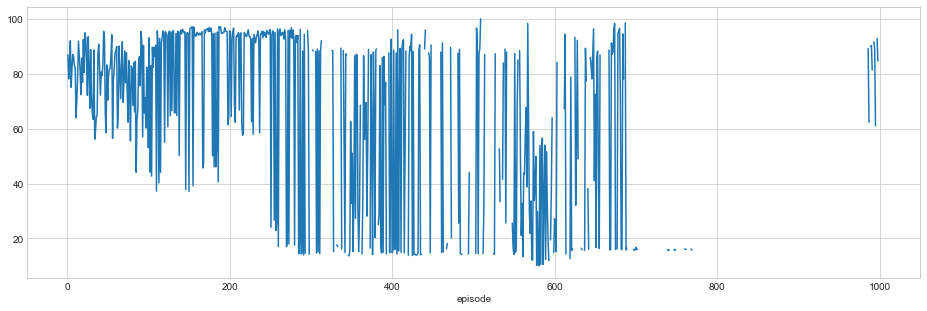

In [16]:
plot_df = results.set_index("episode")

plot_df.mean_validation_scores.plot(figsize=(16, 5))

### Loss vs N Episode

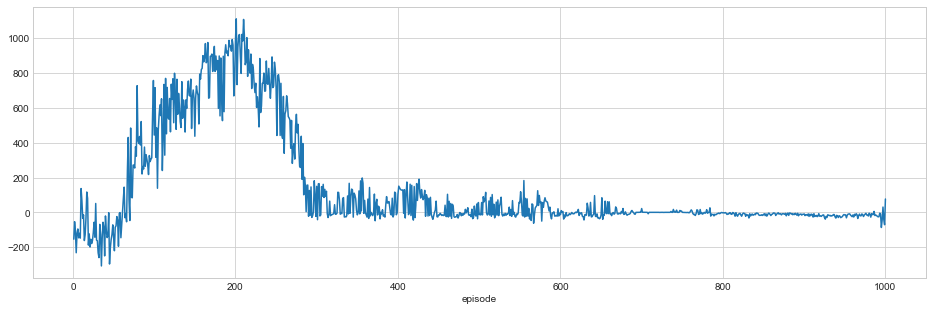

In [18]:
plot_df.losses.plot(figsize=(16, 5))

### Number of Successful and Number Unique MLFs vs. N Episode

Where `framework diversity` is the quotient of the number o

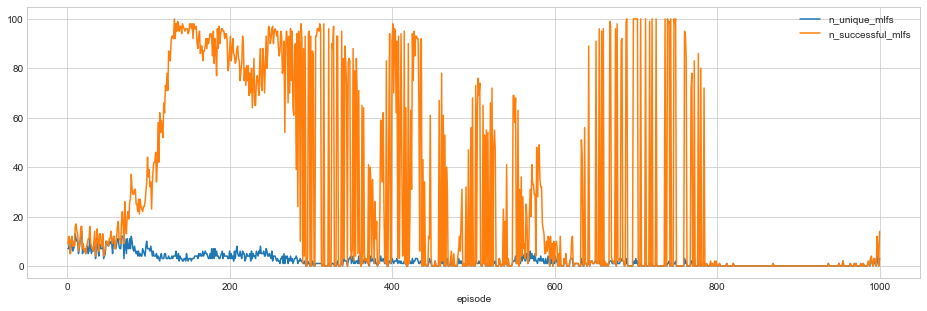

In [50]:
ax = (
    plot_df
    [["n_unique_mlfs", "n_successful_mlfs"]]
    .plot(figsize=(16, 5))
)

### Framework Diversity vs. N Episode

Where `framework diversity` is the quotient of the number unique MLFs and the
number of successful MLFs.

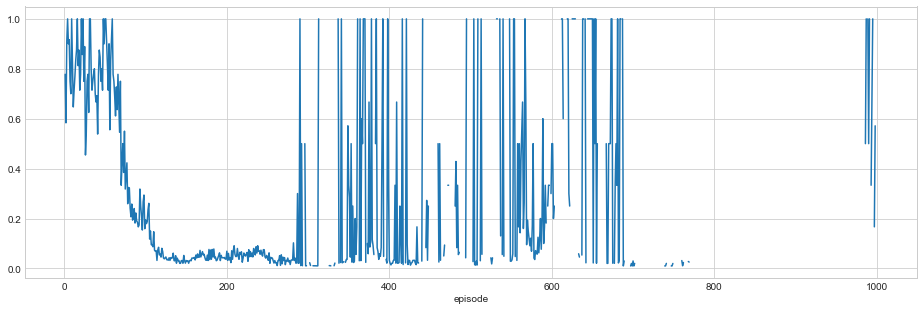

In [51]:
(
    plot_df
    .assign(n_successful_mlfs=lambda df: df.n_successful_mlfs.apply(
        lambda x: np.nan if x == 0 else x))
    .apply(lambda df: (df.n_unique_mlfs / df.n_successful_mlfs), axis=1)
    .plot(figsize=(16, 5))
)

### Episode Number by Data Env

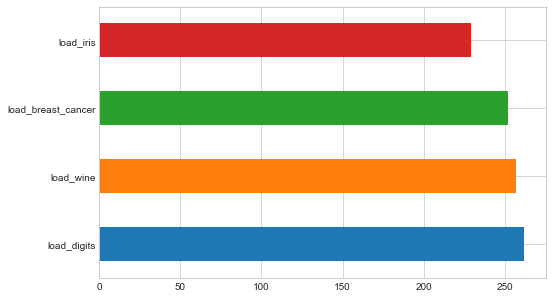

In [61]:
results.data_env_names.value_counts().plot(kind="barh", figsize=(8, 5))

### Mean Validation Score vs. N Episode, by Data Env

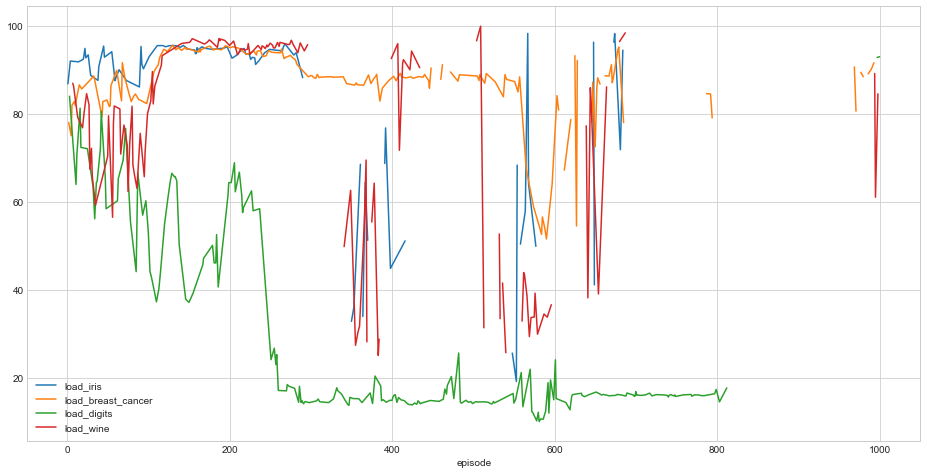

In [71]:
ax = None
for env_name in plot_df.data_env_names.unique():
    _plot_df = plot_df.query("data_env_names == '%s'" % env_name)
    ax = _plot_df["mean_validation_scores"].plot(
        ax=ax, label=env_name, legend=True, figsize=(16, 8))

### Loss vs. N Episode, by Data Env

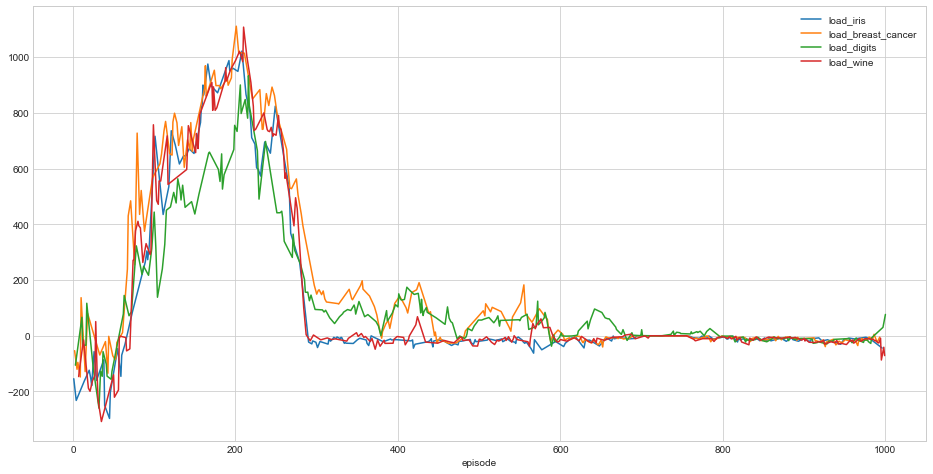

In [72]:
ax = None
for env_name in plot_df.data_env_names.unique():
    _plot_df = plot_df.query("data_env_names == '%s'" % env_name)
    ax = _plot_df["losses"].plot(
        ax=ax, label=env_name, legend=True, figsize=(16, 8))